# Data for Assignment 5 


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

from data_utils import plot_decision_boundary, load_moons

%matplotlib inline

## 1. Load data set

Make two interleaving half circles (using scikit-learn).

A simple dataset to visualize classification algorithms.

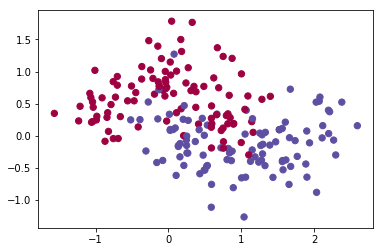

In [9]:
train_X, train_Y = load_moons()

### Logistic regression 

In [10]:
# Class LogisticRegressionCV implements a logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();

# Returns 1-d array of shape (m,) 
C = np.ravel(train_Y)

# Fit the model given the training data
clf.fit(train_X.T, C.T)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### Predict labels using the logistic regression classifier

In [11]:
# Print accuracy
# clf.predict returns labels for examples (of shape (m,n)) in x of shape (m,)
LR_predictions = clf.predict(train_X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(train_Y,LR_predictions) + np.dot(1-train_Y,1-LR_predictions))/float(train_Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 82 % (percentage of correctly labelled datapoints)


### Plot decision boundary

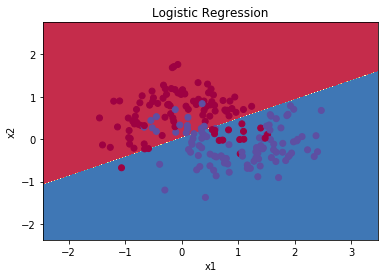

In [6]:
# Plot the decision boundary for logistic regression
plt.title("Logistic Regression")
plot_decision_boundary(lambda x: clf.predict(x), train_X, C)

Test ccuracy of logistic regression: 84 % (percentage of correctly labelled datapoints)


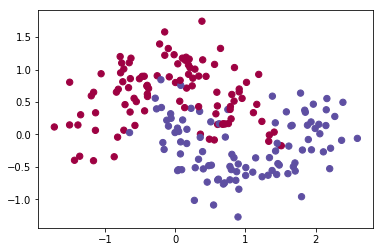

In [7]:
# Print accuracy on a test set generated using the same distribution
test_X, test_Y = load_moons()

# clf.predict returns labels for examples (of shape (m,n)) in x of shape (m,)
LR_predictions = clf.predict(test_X.T)
print ('Test ccuracy of logistic regression: %d ' % float((np.dot(test_Y,LR_predictions) + np.dot(1-test_Y,1-LR_predictions))/float(test_Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

## 2. Discussion on plotting the decision boundary

The function for plotting the decision function takes as arguments an anonymous function 
used to generate the predicted labels, and applies the function to the training data.

plot_decision_boundary(lambda x: clf.predict(x), train_X, C)

The function calls the predict method from the class
LogisticRegressionCV that implements logistic regression in scikit-learn.

---------------------------------------------------------------

predict(X)[source]
Predict class labels for samples in X.

Parameters:	
X : {array-like, sparse matrix}, shape = [n_samples, n_features]

Samples.

Returns:	
C : array, shape = [n_samples]

Predicted class label per sample.

---------------------------------------------------------------

In order to use the same function for plotting the decision boundary
for your neural network model, you need a function for predicting the labels.
Because of the matrix dimensions, you need a separate function that takes as input
the training examples using a matrix of shape (m,n) and outputs the labels
as a 1-d array.

For example, you can implement a function:

predict_plot(parameters,X) 

where paramaters are the weights and biases of the neural network model and 
X is the training data size of shape (m,n).

Then, you can plot the boundary using 

plot_decision_boundary(lambda x: predict_plot(parameters, x), train_X, C)
